<a href="https://www.kaggle.com/code/joyb05/pima-indian-diabetes-dataset-smote?scriptVersionId=100449440" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# PIMA Indian Diabetes Dataset 

### About Dataset

#### Context
###### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
##### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Problem Statement:
Build a model to accurately predict whether the patients in the dataset have diabetes or not. The datasets consists of several medical predictor variables and one target variable, Outcome. 

##### Pregnancies: Number of times pregnant
##### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
##### BloodPressure: Diastolic blood pressure (mm Hg)
##### SkinThickness: Triceps skin fold thickness (mm)
##### Insulin: 2-Hour serum insulin (mu U/ml)
##### BMI: Body mass index (weight in kg/(height in m)^2)
##### DiabetesPedigreeFunction: Diabetes pedigree function
##### Age: Age (years)
##### Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Contribution towards the project:

#### The objective is to find a model which will be able to predict whether a person is likely to have diabetes or not given their medical records. Various classification models will be tested against this dataset to find the one which will be best suited for this problem, so that given the symptoms we can predict the outcome of the patient before hand so that precautionary measures can be taken.

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#### Importing Data

In [2]:
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

#### Understanding the Dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Finding missing values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


###### From the describe function we can have a understanding that the null or the missing values of this dataset has already been altered with zero

#### Finding Correlation

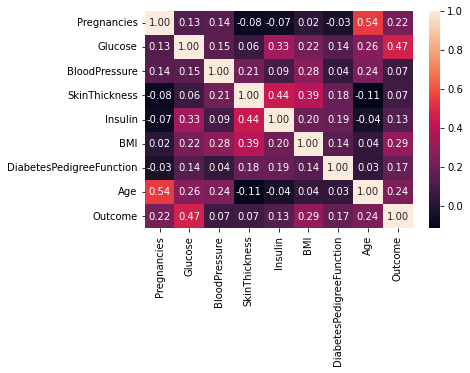

In [7]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

#### Exploratory Data Analysis

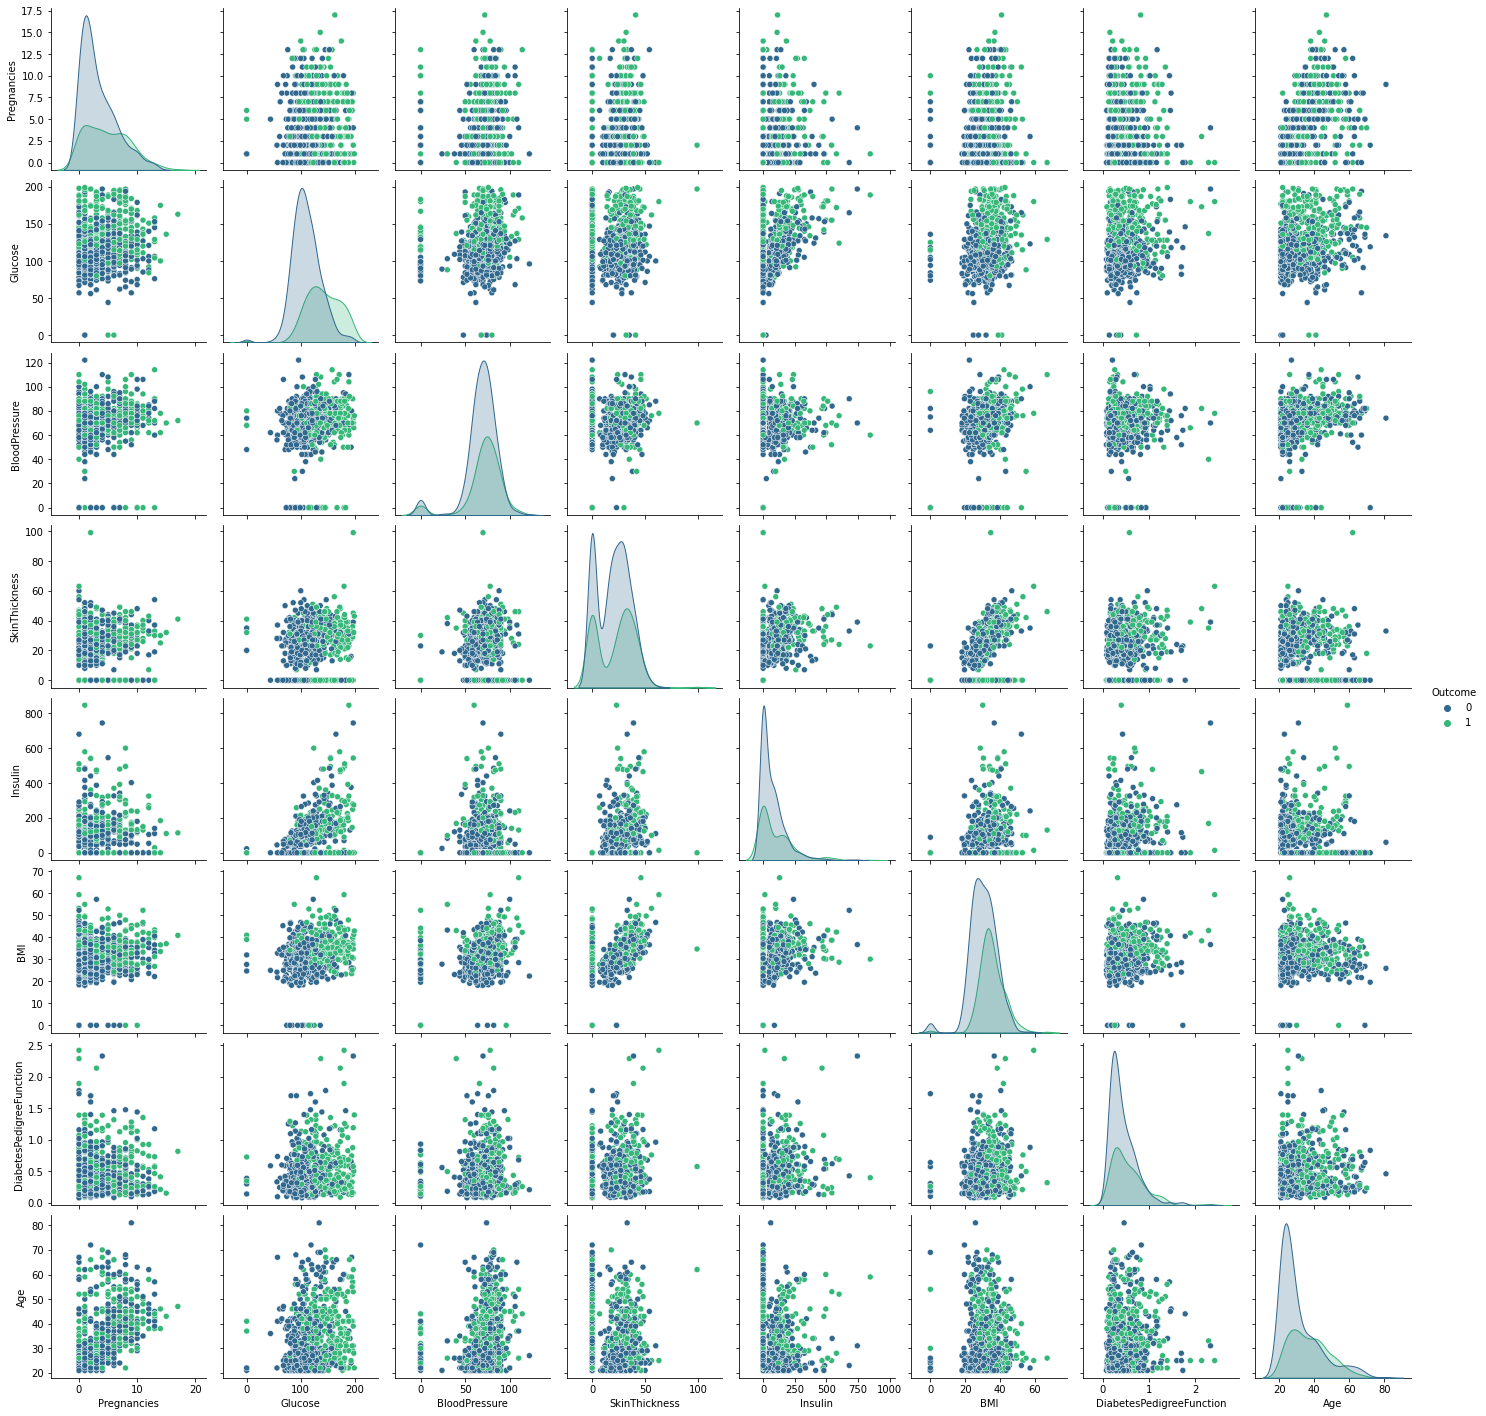

In [8]:
sns.pairplot(df, hue = 'Outcome', palette= 'viridis')

Text(0.5, 1.0, 'Diabetes Patient')

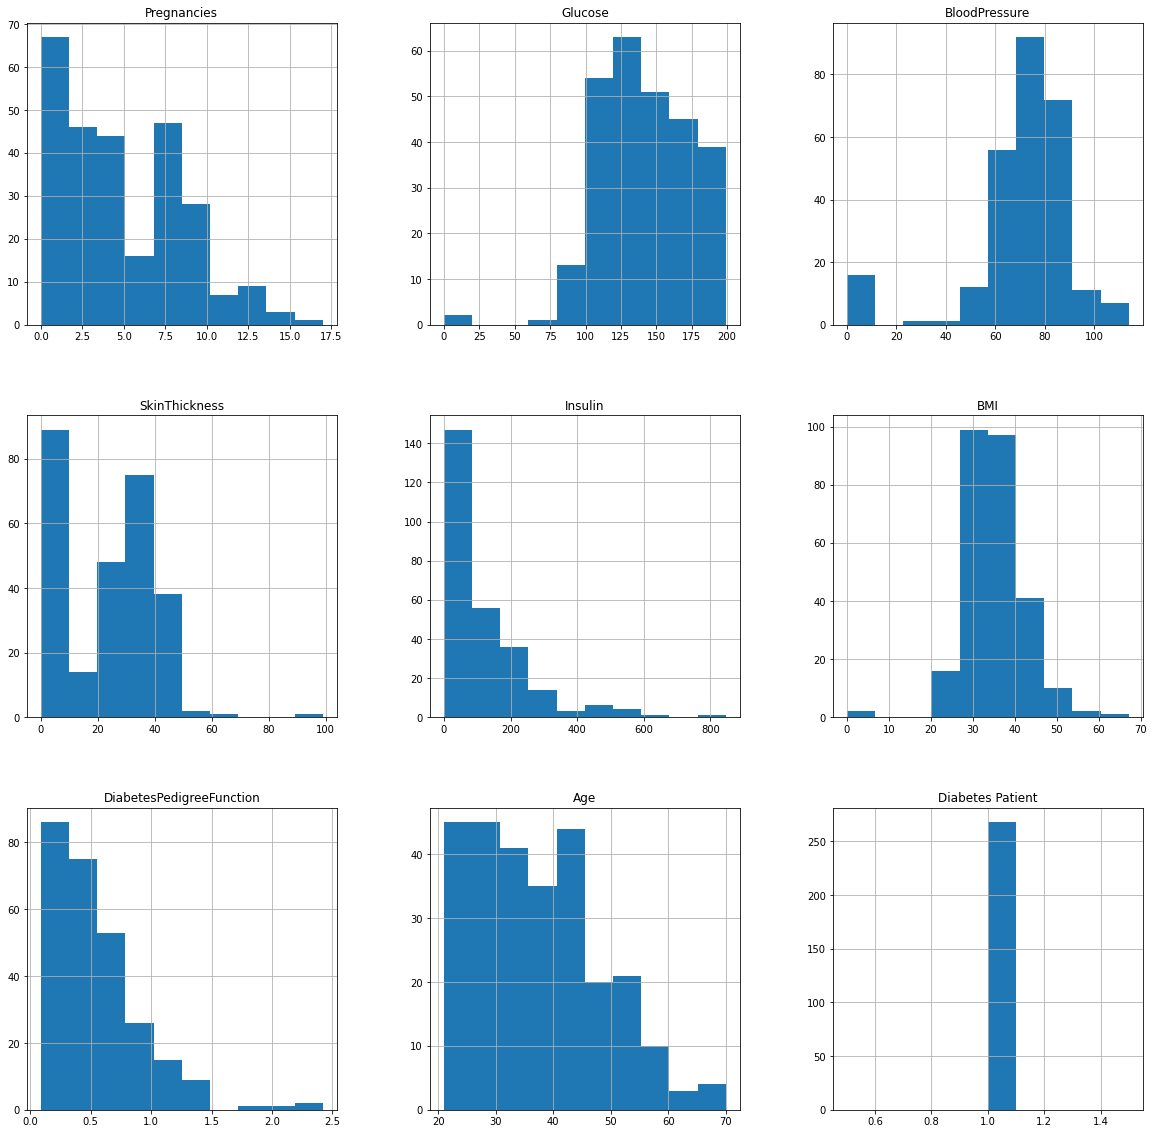

In [9]:
p = df[df['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

Text(0.5, 1.0, 'Diabetes Patient')

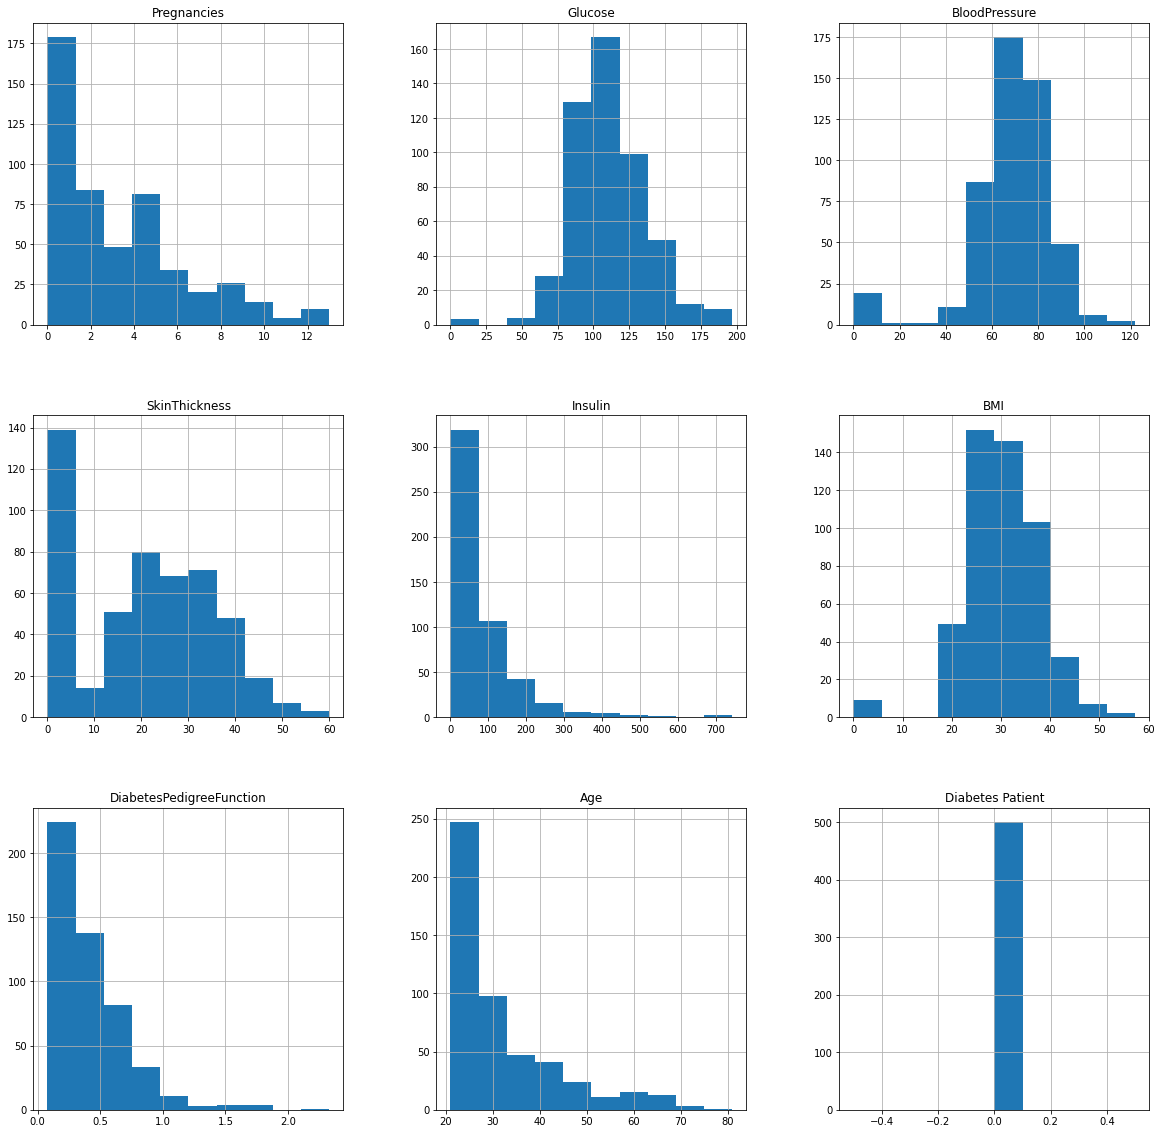

In [10]:
p = df[df['Outcome']==0].hist(figsize = (20,20))
plt.title('Diabetes Patient')

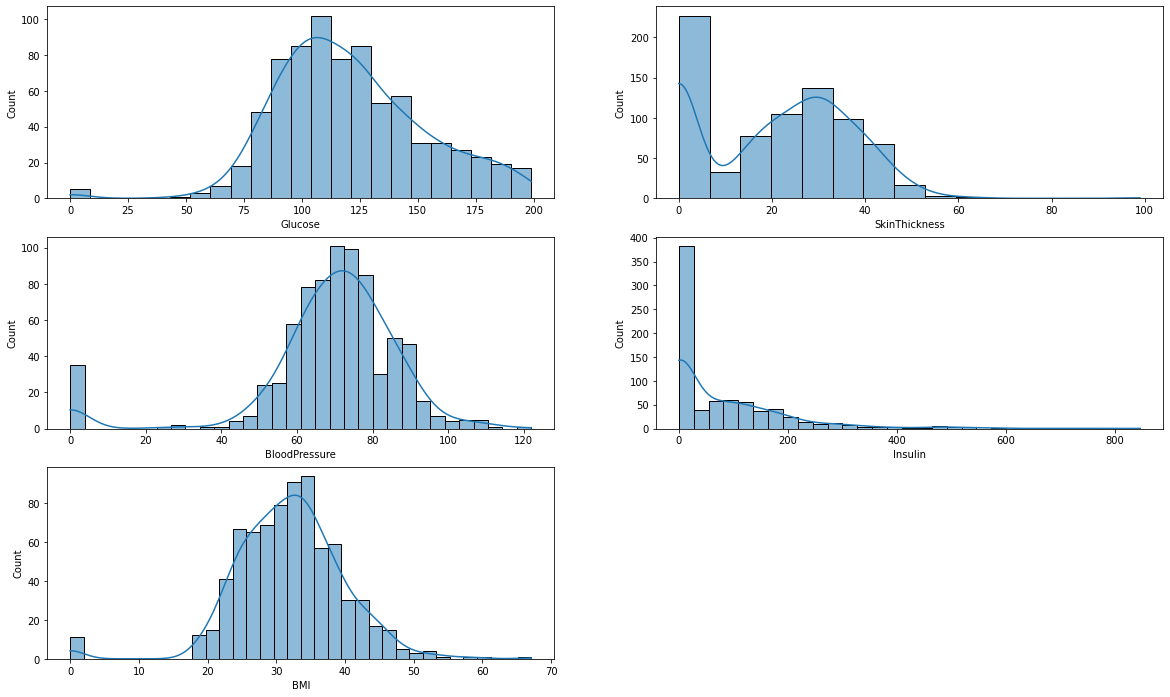

In [11]:
plt.figure(figsize=[20,12])
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
sns.histplot(data= df, x='Glucose', kde=True, ax=ax1)
sns.histplot(data= df, x='SkinThickness', kde=True, ax=ax2)
sns.histplot(data= df, x='BloodPressure', kde=True, ax=ax3)
sns.histplot(data= df, x='Insulin', kde=True, ax=ax4)
sns.histplot(data= df, x='BMI', kde=True, ax=ax5)
plt.show()

##### From the histogram plot we can see that these five features has some 0 value, which is not possible. Skin thickness & insulin has the highest 0 values in the dataset.

### Finding the number of values as 0.

In [12]:
num_missing = (df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()
print(num_missing)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


### Replacing 0 with NaN value for imputation.

In [13]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, nan)
# count the number of nan values in each column
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [14]:
#percentage of missing value

df.isna().sum() * 100 / df.shape[0]

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

#### We can see Insulin has 48.7% of missing value.

#### Visualizing the missing values with the help of heatmap

<AxesSubplot:>

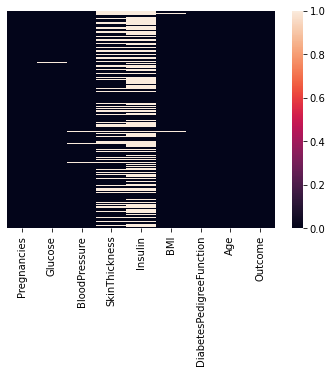

In [15]:
sns.heatmap(df.isnull(), yticklabels= False)

## Imputation of missing values

In [16]:
df_pima = df
df_pima.shape

(768, 9)

In [17]:
df_pima.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
mice = IterativeImputer(estimator= RandomForestRegressor(), random_state= 0)

In [19]:
df_pima[["Pregnancies", "Insulin", "SkinThickness", "Glucose", "BloodPressure", "BMI"]] = mice.fit_transform(df_pima[["Pregnancies", "Insulin","SkinThickness", "Glucose", "BloodPressure", "BMI"]])

In [20]:
df_pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,211.70,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00,59.06,26.6,0.351,31,0
2,8.0,183.0,64.0,19.55,293.06,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2.0,122.0,70.0,27.00,189.48,36.8,0.340,27,0
765,5.0,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1.0,126.0,60.0,26.84,172.68,30.1,0.349,47,1


In [21]:
df_pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

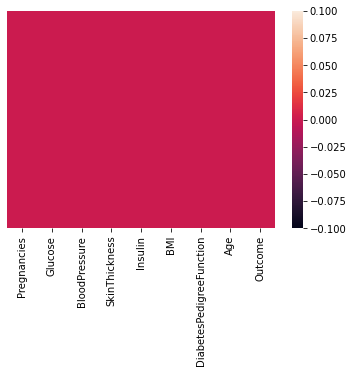

In [22]:
sns.heatmap(df_pima.isnull(), yticklabels= False)

#### Visualizing the binary class

<AxesSubplot:xlabel='Outcome', ylabel='count'>

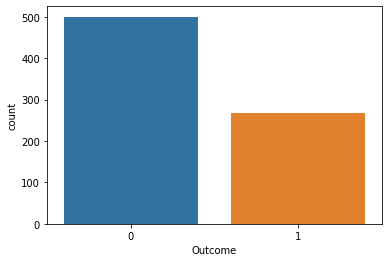

In [23]:
sns.countplot(x = 'Outcome', data = df_pima)

In [24]:
(df_pima['Outcome']==1).sum()*100 / df_pima.shape[0]

34.895833333333336

We can see the class is not uniformy distributed. Hence, this has to taken care during modeling.

<AxesSubplot:xlabel='Age'>

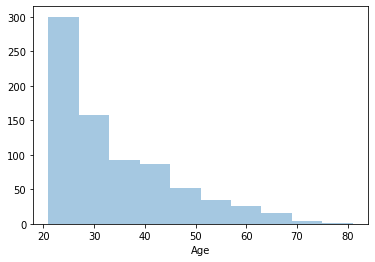

In [25]:
sns.distplot(df_pima['Age'],kde=False,bins=10)

<AxesSubplot:xlabel='Pregnancies'>

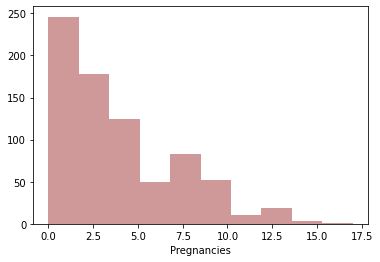

In [26]:
sns.distplot(df_pima['Pregnancies'].dropna(),kde=False,bins=10, color = 'darkred')

<AxesSubplot:xlabel='BMI'>

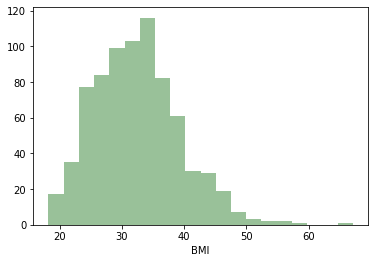

In [27]:
sns.distplot(df_pima['BMI'].dropna(),kde=False,bins=20, color= 'darkgreen')

<AxesSubplot:xlabel='Glucose'>

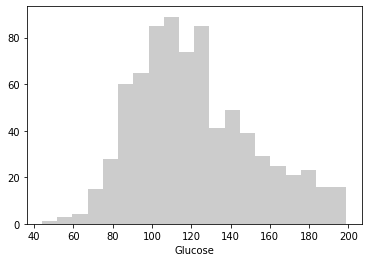

In [28]:
sns.distplot(df_pima['Glucose'].dropna() ,kde=False,bins=20, color= 'grey')

In [29]:
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.623750,72.424036,28.846875,154.384701,32.458861,0.471876,33.240885,0.348958
std,3.369578,30.470227,12.174694,9.652484,98.817725,6.879683,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,88.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,132.320000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.882500,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualizing & Treating outliers

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

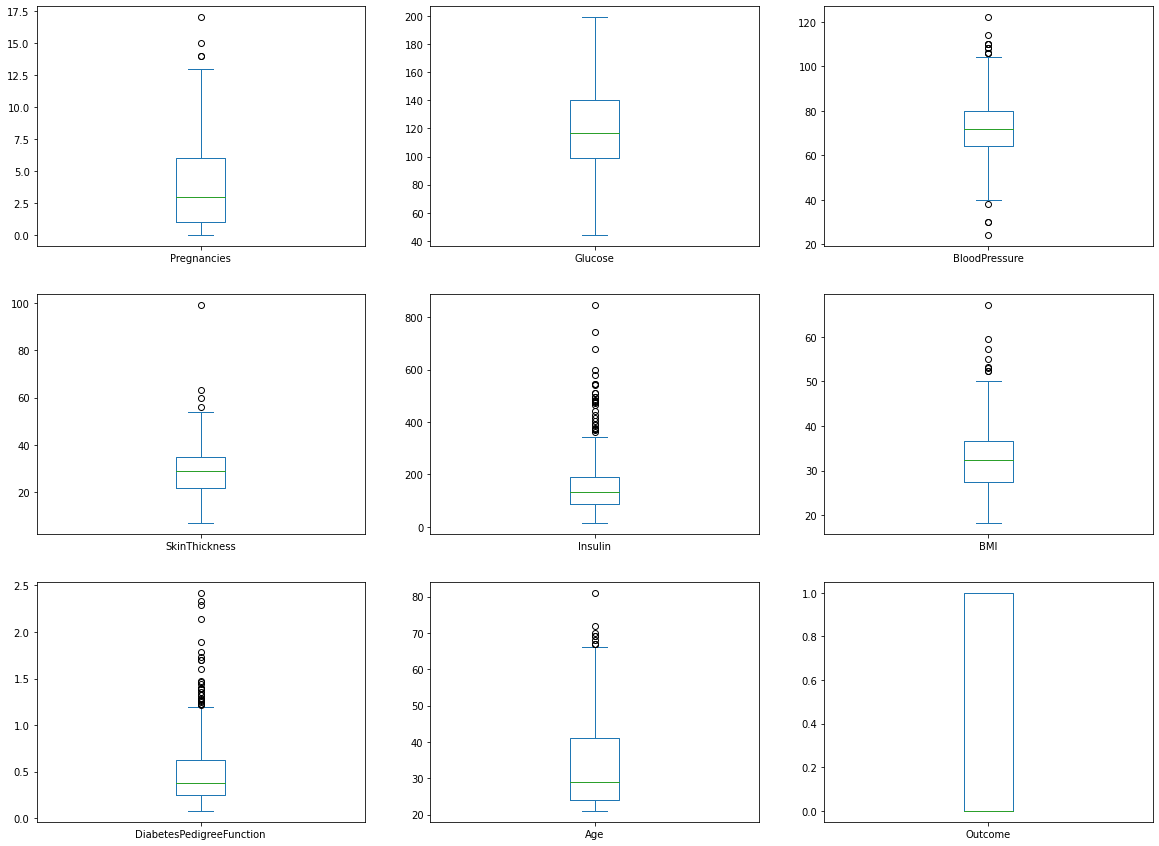

In [30]:
#Box and Whisker plot to visualize the distribution of all atributes
df_pima.plot(kind= 'box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [31]:
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

In [32]:
# model specification
model1 = LocalOutlierFactor(n_neighbors=10)
# model fitting
y_pred = model1.fit_predict(df_pima)
# filter outlier index
not_outlier_index = np.where(y_pred == 1)
outlier_index = np.where(y_pred == -1)# negative values are outliers and positives inliers
# filter outlier values
df_pima_1 = df_pima.iloc[not_outlier_index]

In [33]:
df_pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,211.70,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00,59.06,26.6,0.351,31,0
2,8.0,183.0,64.0,19.55,293.06,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2.0,122.0,70.0,27.00,189.48,36.8,0.340,27,0
765,5.0,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1.0,126.0,60.0,26.84,172.68,30.1,0.349,47,1


In [34]:
df_pima_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,211.70,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00,59.06,26.6,0.351,31,0
2,8.0,183.0,64.0,19.55,293.06,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2.0,122.0,70.0,27.00,189.48,36.8,0.340,27,0
765,5.0,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1.0,126.0,60.0,26.84,172.68,30.1,0.349,47,1


In [35]:
df_pima_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               747 non-null    float64
 1   Glucose                   747 non-null    float64
 2   BloodPressure             747 non-null    float64
 3   SkinThickness             747 non-null    float64
 4   Insulin                   747 non-null    float64
 5   BMI                       747 non-null    float64
 6   DiabetesPedigreeFunction  747 non-null    float64
 7   Age                       747 non-null    int64  
 8   Outcome                   747 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 58.4 KB


### Making copies of the dataset

In [36]:
df_pima_l = df_pima_1

In [37]:
df_pima_lr = df_pima_1

In [38]:
df_pima_xgb = df_pima_1

In [39]:
df_pima_q = df_pima_1

In [40]:
df_pima_k = df_pima_1

### Spliting the dataset into Train and Test

In [41]:
X = df_pima_1.drop(["Outcome"], axis = 1)
y = df_pima_1.Outcome

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=10, test_size= 0.3, stratify= y)

### K - Nearest Neighbour

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    test_scores.append(knn.score(X_test,y_test))

In [46]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.33333333333333 % and k = [22]


In [47]:
knn = KNeighborsClassifier(8)

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [49]:
knn_pred = knn.predict(X_test)

In [50]:
score = metrics.accuracy_score(y_test, knn_pred)
score

0.7688888888888888

In [51]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.71      0.57      0.63        79

    accuracy                           0.77       225
   macro avg       0.75      0.72      0.73       225
weighted avg       0.76      0.77      0.76       225



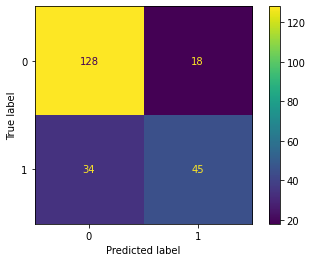

In [52]:
cm = confusion_matrix(y_test, knn_pred, labels= knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knn.classes_)
disp.plot()
plt.show()

#### Feature importance for KNN

Feature: 0, Score: 0.00881
Feature: 1, Score: 0.06207
Feature: 2, Score: 0.00115
Feature: 3, Score: 0.00536
Feature: 4, Score: 0.01188
Feature: 5, Score: 0.01954
Feature: 6, Score: -0.00728
Feature: 7, Score: 0.00805


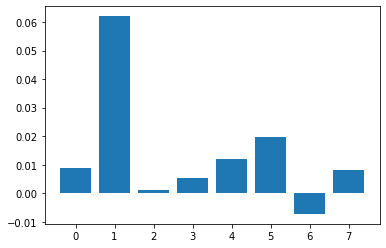

In [53]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knn, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [54]:
df_pima_k.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [55]:
X_k = df_pima_k.drop(["Outcome", "DiabetesPedigreeFunction"], axis = 1)
y_k = df_pima_k.Outcome

In [56]:
scaler = StandardScaler()
X_scaled_k = scaler.fit_transform(X_k)

In [57]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_scaled_k, y_k, random_state=10, test_size= 0.3, stratify= y_k)

In [58]:
test_scores = []
train_scores = []

for i in range(1,30):

    knn_k = KNeighborsClassifier(i)
    knn_k.fit(X_train_k,y_train_k)
    test_scores.append(knn_k.score(X_test_k,y_test_k))

In [59]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.0 % and k = [14, 24, 28]


In [60]:
knn_k = KNeighborsClassifier(21)

In [61]:
knn_k.fit(X_train_k,y_train_k)

KNeighborsClassifier(n_neighbors=21)

In [62]:
knn_pred = knn_k.predict(X_test_k)

In [63]:
score = metrics.accuracy_score(y_test_k, knn_pred)
score

0.7244444444444444

In [64]:
print(classification_report(y_test_k, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       146
           1       0.61      0.61      0.61        79

    accuracy                           0.72       225
   macro avg       0.70      0.70      0.70       225
weighted avg       0.72      0.72      0.72       225



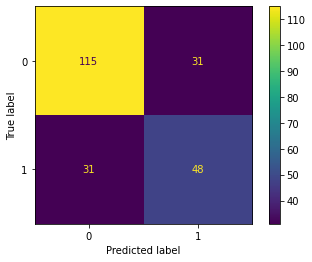

In [65]:
cm = confusion_matrix(y_test_k, knn_pred, labels= knn_k.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knn.classes_)
disp.plot()
plt.show()

### Linear Discriminent Analysis

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [67]:
lda = LinearDiscriminantAnalysis()

In [68]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [69]:
lda_pred = lda.predict(X_test)

In [70]:
score = metrics.accuracy_score(y_test, lda_pred)
score

0.7555555555555555

In [71]:
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       146
           1       0.69      0.56      0.62        79

    accuracy                           0.76       225
   macro avg       0.74      0.71      0.72       225
weighted avg       0.75      0.76      0.75       225



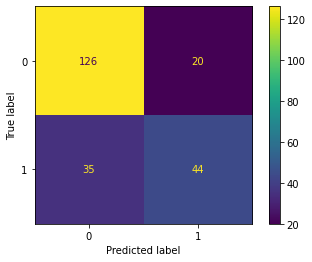

In [72]:
cm = confusion_matrix(y_test, lda_pred, labels= lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.00575
Feature: 1, Score: 0.11724
Feature: 2, Score: -0.00575
Feature: 3, Score: -0.00460
Feature: 4, Score: -0.00115
Feature: 5, Score: 0.01686
Feature: 6, Score: 0.01418
Feature: 7, Score: -0.00038


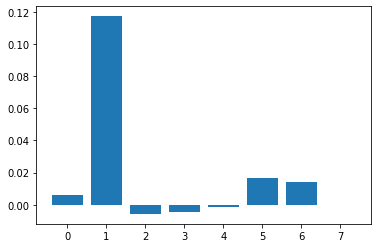

In [73]:
# perform permutation importance
results = permutation_importance(lda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [74]:
df_pima_l.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [75]:
X_l = df_pima_l.drop(["Outcome", "Insulin"], axis = 1)
y_l = df_pima_l.Outcome

In [76]:
scaler = StandardScaler()
X_scaled_l = scaler.fit_transform(X_l)

In [77]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_scaled_l, y_l, random_state=10, test_size= 0.3, stratify= y_l)

In [78]:
lda_1 = LinearDiscriminantAnalysis()

In [79]:
lda_1.fit(X_train_l, y_train_l)

LinearDiscriminantAnalysis()

In [80]:
lda_pred = lda_1.predict(X_test_l)

In [81]:
score = metrics.accuracy_score(y_test_l, lda_pred)
score

0.7555555555555555

In [82]:
print(classification_report(y_test_l, lda_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       146
           1       0.69      0.56      0.62        79

    accuracy                           0.76       225
   macro avg       0.74      0.71      0.72       225
weighted avg       0.75      0.76      0.75       225



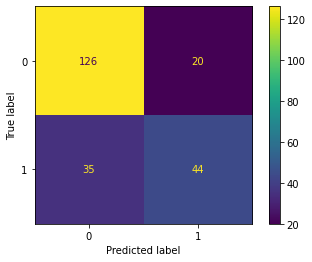

In [83]:
cm = confusion_matrix(y_test_l, lda_pred, labels= lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lda.classes_)
disp.plot()
plt.show()

### Quadratic Discriminent Analysis

In [84]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [85]:
qda = QuadraticDiscriminantAnalysis(priors=np.array([0.47,0.53]))

In [86]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=array([0.47, 0.53]))

In [87]:
qda_pred = qda.predict(X_test)

In [88]:
score = metrics.accuracy_score(y_test, qda_pred)
score

0.72

In [89]:
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       146
           1       0.59      0.70      0.64        79

    accuracy                           0.72       225
   macro avg       0.70      0.71      0.70       225
weighted avg       0.74      0.72      0.72       225



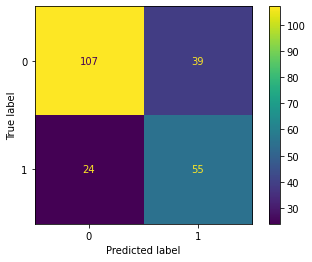

In [90]:
cm = confusion_matrix(y_test, qda_pred, labels= qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= qda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.06552
Feature: 1, Score: 0.14330
Feature: 2, Score: 0.00153
Feature: 3, Score: 0.04253
Feature: 4, Score: 0.05441
Feature: 5, Score: 0.06897
Feature: 6, Score: 0.02720
Feature: 7, Score: 0.03448


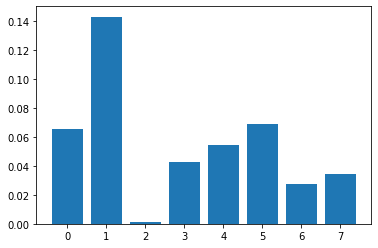

In [91]:
# perform permutation importance
results = permutation_importance(qda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [92]:
df_pima_q.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [93]:
X_q = df_pima_q.drop(["Outcome","BloodPressure"], axis = 1)
y_q = df_pima_q.Outcome

In [94]:
scaler = StandardScaler()
X_scaled_q = scaler.fit_transform(X_q)

In [95]:
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_scaled_q, y_q, random_state=10, test_size= 0.3, stratify= y_q)

In [96]:
qda_1 = QuadraticDiscriminantAnalysis(priors=np.array([0.47,0.53]))

In [97]:
qda_1.fit(X_train_q, y_train_q)

QuadraticDiscriminantAnalysis(priors=array([0.47, 0.53]))

In [98]:
qda_pred = qda_1.predict(X_test_q)

In [99]:
score = metrics.accuracy_score(y_test_q, qda_pred)
score

0.7155555555555555

In [100]:
print(classification_report(y_test_q, qda_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       146
           1       0.58      0.70      0.63        79

    accuracy                           0.72       225
   macro avg       0.70      0.71      0.70       225
weighted avg       0.73      0.72      0.72       225



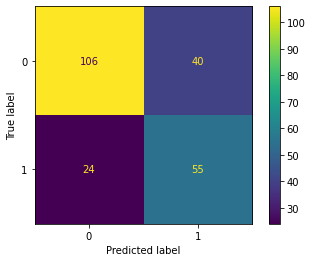

In [101]:
cm = confusion_matrix(y_test_q, qda_pred, labels= qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= qda.classes_)
disp.plot()
plt.show()

### Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr = LogisticRegression(C= 2, class_weight= 0)

In [104]:
lr.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=0)

In [105]:
lr_pred = lr.predict(X_test)

In [106]:
metrics.accuracy_score(y_test,lr_pred)

0.76

In [107]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       146
           1       0.70      0.56      0.62        79

    accuracy                           0.76       225
   macro avg       0.74      0.71      0.72       225
weighted avg       0.75      0.76      0.75       225



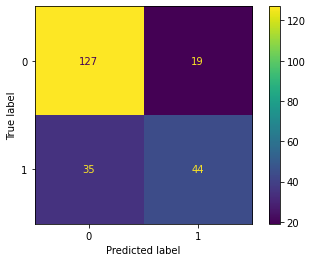

In [108]:
cm = confusion_matrix(y_test, lr_pred, labels= lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lr.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.37048
Feature: 1, Score: 1.06385
Feature: 2, Score: 0.10841
Feature: 3, Score: 0.24174
Feature: 4, Score: -0.04319
Feature: 5, Score: 0.48629
Feature: 6, Score: 0.27715
Feature: 7, Score: 0.06608


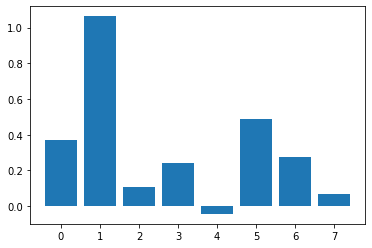

In [109]:
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Logistic Regression using Stats Model

In [110]:
import statsmodels.api as sm

In [111]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.519864
         Iterations 6


In [112]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  522
Model:                          Logit   Df Residuals:                      514
Method:                           MLE   Df Model:                            7
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.1975
Time:                        04:55:01   Log-Likelihood:                -271.37
converged:                       True   LL-Null:                       -338.15
Covariance Type:            nonrobust   LLR p-value:                 1.129e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3649      0.132      2.773      0.006       0.107       0.623
x2             1.0185      0.166      6.128      0.000       0.693       1.344
x3             0.0996      0.118      0.846      0.3

In [113]:
df_pima_lr.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [114]:
X_lr = df_pima_lr.drop(["Outcome","Insulin"], axis = 1)
y_lr = df_pima_lr.Outcome

In [115]:
scaler = StandardScaler()
X_scaled_lr = scaler.fit_transform(X_lr)

In [116]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled_lr, y_lr, random_state=10, test_size= 0.3, stratify= y_lr)

In [117]:
lr_1 = LogisticRegression(C= 2, class_weight= 0)

In [118]:
lr_1.fit(X_train_lr, y_train_lr)

LogisticRegression(C=2, class_weight=0)

In [119]:
lr_pred = lr_1.predict(X_test_lr)

In [120]:
metrics.accuracy_score(y_test_lr,lr_pred)

0.7555555555555555

In [121]:
print(classification_report(y_test_lr, lr_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       146
           1       0.69      0.56      0.62        79

    accuracy                           0.76       225
   macro avg       0.74      0.71      0.72       225
weighted avg       0.75      0.76      0.75       225



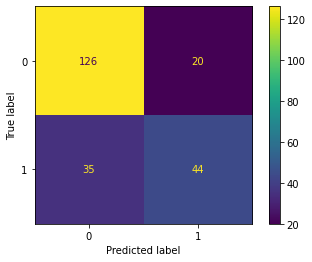

In [122]:
cm = confusion_matrix(y_test_lr, lr_pred, labels= lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lr.classes_)
disp.plot()
plt.show()

### XG- Boost

In [123]:
from xgboost import XGBClassifier

In [124]:
xgb = XGBClassifier(n_estimators=2000, max_depth=3, 
                    learning_rate=0.2, booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [125]:
pred_x = xgb.predict(X_test)

In [126]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.7555555555555555

In [127]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       146
           1       0.65      0.67      0.66        79

    accuracy                           0.76       225
   macro avg       0.73      0.74      0.73       225
weighted avg       0.76      0.76      0.76       225



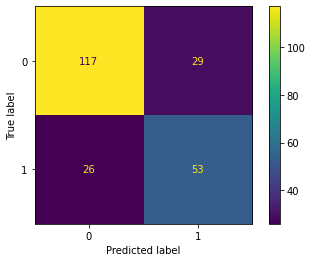

In [128]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

In [129]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [130]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'n_estimators': hp.quniform('n_estimator',1000, 5000, 500),
        'learning_rate': hp.uniform('learning_rate', 0.01, 5),
        'seed': 0
    }
        

In [131]:
def objective(space):
    clf= XGBClassifier(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),
                    learning_rate= int(space['learning_rate']), colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [132]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 300,
                        trials = trials)

SCORE:
0.6355555555555555
SCORE:
0.6488888888888888
SCORE:
0.72
SCORE:
0.6488888888888888
SCORE:
0.7022222222222222
SCORE:
0.6488888888888888
SCORE:
0.7155555555555555
SCORE:
0.7377777777777778
SCORE:
0.6888888888888889
SCORE:
0.6755555555555556
SCORE:
0.7288888888888889
SCORE:
0.6755555555555556
SCORE:
0.6488888888888888
SCORE:
0.64
SCORE:
0.6488888888888888
SCORE:
0.6755555555555556
SCORE:
0.6844444444444444
SCORE:
0.6844444444444444
SCORE:
0.72
SCORE:
0.6488888888888888
SCORE:
0.6711111111111111
SCORE:
0.68
SCORE:
0.7155555555555555
SCORE:
0.7155555555555555
SCORE:
0.7288888888888889
SCORE:
0.68
SCORE:
0.7288888888888889
SCORE:
0.6488888888888888
SCORE:
0.68
SCORE:
0.7288888888888889
SCORE:
0.6577777777777778
SCORE:
0.6488888888888888
SCORE:
0.72
SCORE:
0.6755555555555556
SCORE:
0.6977777777777778
SCORE:
0.7022222222222222
SCORE:
0.6488888888888888
SCORE:
0.7155555555555555
SCORE:
0.7288888888888889
SCORE:
0.6488888888888888
SCORE:
0.6888888888888889
SCORE:
0.7155555555555555
SCORE:

In [133]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8383867865671555, 'learning_rate': 1.3260230193255513, 'max_depth': 3.0, 'n_estimator': 1500.0}


In [134]:
xgb = XGBClassifier(n_estimators = 2500, colsample_bytree = 0.9850128139596833,learning_rate = 1.7789178816323956, 
                    max_depth = 4,
                    booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9850128139596833, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.7789178816323956,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2500, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [135]:
pred_x = xgb.predict(X_test)

In [136]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.7288888888888889

In [137]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       146
           1       0.62      0.59      0.61        79

    accuracy                           0.73       225
   macro avg       0.70      0.70      0.70       225
weighted avg       0.73      0.73      0.73       225



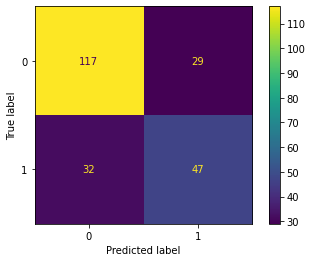

In [138]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.24505
Feature: 1, Score: 0.21738
Feature: 2, Score: 0.06140
Feature: 3, Score: 0.12164
Feature: 4, Score: 0.03269
Feature: 5, Score: 0.18952
Feature: 6, Score: 0.01643
Feature: 7, Score: 0.11590


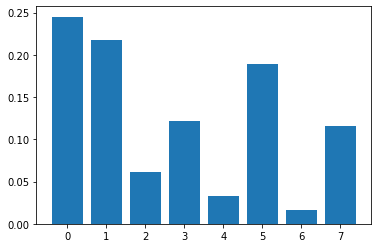

In [139]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### XG-Boost

In [140]:
df_pima_xgb.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [141]:
X_xgb = df_pima_xgb.drop(["Outcome","Insulin"], axis = 1)
y_xgb = df_pima_xgb.Outcome

In [142]:
scaler = StandardScaler()
X_scaled_xgb = scaler.fit_transform(X_xgb)

In [143]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_scaled_xgb, y_xgb, random_state=10, test_size= 0.3, stratify= y_xgb)

In [144]:
def objective(space):
    clf= XGBClassifier(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),
                    learning_rate= int(space['learning_rate']), colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_xgb, y_train_xgb), ( X_test_xgb, y_test_xgb)]
    
    clf.fit(X_train_xgb, y_train_xgb,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test_xgb)
    accuracy = accuracy_score(y_test_xgb, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [145]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 300,
                        trials = trials)

SCORE:
0.6488888888888888
SCORE:
0.6666666666666666
SCORE:
0.6844444444444444
SCORE:
0.6488888888888888
SCORE:
0.6488888888888888
SCORE:
0.6533333333333333
SCORE:
0.6666666666666666
SCORE:
0.6488888888888888
SCORE:
0.6666666666666666
SCORE:
0.6577777777777778
SCORE:
0.6488888888888888
SCORE:
0.6666666666666666
SCORE:
0.6488888888888888
SCORE:
0.6488888888888888
SCORE:
0.6488888888888888
SCORE:
0.7155555555555555
SCORE:
0.6533333333333333
SCORE:
0.6666666666666666
SCORE:
0.5555555555555556
SCORE:
0.7155555555555555
SCORE:
0.7155555555555555
SCORE:
0.68
SCORE:
0.6488888888888888
SCORE:
0.7155555555555555
SCORE:
0.7244444444444444
SCORE:
0.6844444444444444
SCORE:
0.6488888888888888
SCORE:
0.6488888888888888
SCORE:
0.7244444444444444
SCORE:
0.6977777777777778
SCORE:
0.7111111111111111
SCORE:
0.7244444444444444
SCORE:
0.6844444444444444
SCORE:
0.6488888888888888
SCORE:
0.6533333333333333
SCORE:
0.6711111111111111
SCORE:
0.6488888888888888
SCORE:
0.6444444444444445
SCORE:
0.68
SCORE:
0.70222

In [146]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.688537861299005, 'learning_rate': 1.0952572680089399, 'max_depth': 7.0, 'n_estimator': 1500.0}


In [147]:
xgb_1 = XGBClassifier(n_estimators = 3000, colsample_bytree = 0.5041150538841064,learning_rate = 2.1766229709014135, 
                    max_depth = 3,
                    booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb_1.fit(X= X_train_xgb, y= y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.5041150538841064, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=2.1766229709014135,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=3000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [148]:
xgb_pred = xgb_1.predict(X_test_xgb)

In [149]:
metrics.accuracy_score(y_test_xgb,xgb_pred)

0.7022222222222222

In [150]:
print(classification_report(y_test_xgb, xgb_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       146
           1       0.58      0.56      0.57        79

    accuracy                           0.70       225
   macro avg       0.67      0.67      0.67       225
weighted avg       0.70      0.70      0.70       225



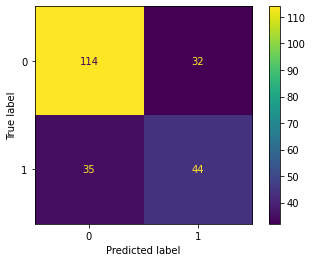

In [151]:
cms = confusion_matrix(y_test_xgb, xgb_pred, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

### AUC-AOC Curve

In [152]:
# predict probabilities
pred_prob1 = knn.predict_proba(X_test)
pred_prob2 = lda.predict_proba(X_test)
pred_prob3 = qda.predict_proba(X_test)
pred_prob4 = lr.predict_proba(X_test)
pred_prob5 = xgb.predict_proba(X_test)

In [153]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [154]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5)

0.828940523669152 0.8159788451534593 0.8336223339691348 0.7908791399341079 0.828940523669152


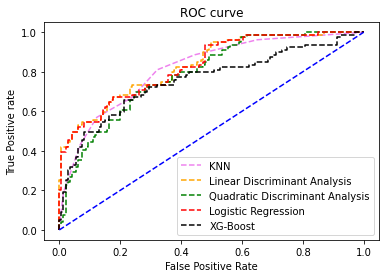

In [155]:
# matplotlib
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='violet', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Linear Discriminant Analysis')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Quadratic Discriminant Analysis')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='XG-Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### Managing imbalance in the Dataset by SMOTE

In [156]:
# pip install imblearn (if you don't have imblearn in your system)
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X_train, y_train.ravel())

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=10, test_size= 0.3)

### K - Nearest Neighbour after SMOTE

In [158]:
from sklearn.neighbors import KNeighborsClassifier

In [159]:
test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    test_scores.append(knn.score(X_test,y_test))

In [160]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 80.88235294117648 % and k = [1]


In [161]:
knn = KNeighborsClassifier(12)

In [162]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [163]:
knn_pred = knn.predict(X_test)

In [164]:
score = metrics.accuracy_score(y_test, knn_pred)
score

0.75

In [165]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72       102
           1       0.70      0.86      0.78       102

    accuracy                           0.75       204
   macro avg       0.76      0.75      0.75       204
weighted avg       0.76      0.75      0.75       204



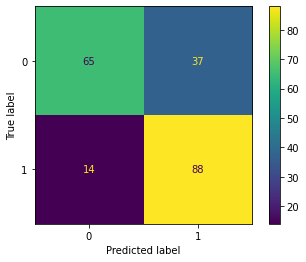

In [166]:
cm = confusion_matrix(y_test, knn_pred, labels= knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knn.classes_)
disp.plot()
plt.show()

#### Feature importance for KNN

Feature: 0, Score: 0.00042
Feature: 1, Score: 0.09789
Feature: 2, Score: 0.01350
Feature: 3, Score: 0.02447
Feature: 4, Score: 0.01477
Feature: 5, Score: 0.03586
Feature: 6, Score: 0.02278
Feature: 7, Score: 0.01561


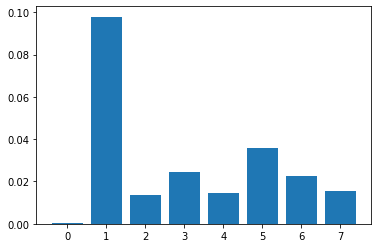

In [167]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knn, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Linear Discriminent Analysis after SMOTE

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [169]:
lda = LinearDiscriminantAnalysis()

In [170]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [171]:
lda_pred = lda.predict(X_test)

In [172]:
score = metrics.accuracy_score(y_test, lda_pred)
score

0.7205882352941176

In [173]:
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       102
           1       0.74      0.68      0.71       102

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204



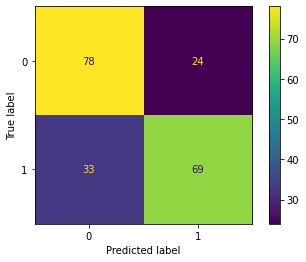

In [174]:
cm = confusion_matrix(y_test, lda_pred, labels= lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.00253
Feature: 1, Score: 0.21561
Feature: 2, Score: 0.00253
Feature: 3, Score: 0.00802
Feature: 4, Score: 0.01013
Feature: 5, Score: 0.05021
Feature: 6, Score: 0.01013
Feature: 7, Score: 0.00380


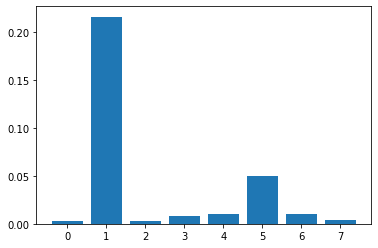

In [175]:
# perform permutation importance
results = permutation_importance(lda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Quadratic Discriminent Analysis after SMOTE

In [176]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [177]:
qda = QuadraticDiscriminantAnalysis(priors=np.array([0.47,0.53]))

In [178]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=array([0.47, 0.53]))

In [179]:
qda_pred = qda.predict(X_test)

In [180]:
score = metrics.accuracy_score(y_test, qda_pred)
score

0.696078431372549

In [181]:
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       102
           1       0.69      0.71      0.70       102

    accuracy                           0.70       204
   macro avg       0.70      0.70      0.70       204
weighted avg       0.70      0.70      0.70       204



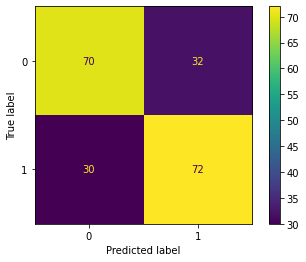

In [182]:
cm = confusion_matrix(y_test, qda_pred, labels= qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= qda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.01646
Feature: 1, Score: 0.18354
Feature: 2, Score: 0.01646
Feature: 3, Score: 0.02827
Feature: 4, Score: 0.01013
Feature: 5, Score: 0.06456
Feature: 6, Score: 0.02532
Feature: 7, Score: 0.03376


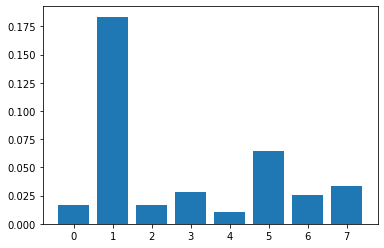

In [183]:
# perform permutation importance
results = permutation_importance(qda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Logistic Regression after SMOTE

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
lr = LogisticRegression(C= 2, class_weight= 0)

In [186]:
lr.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=0)

In [187]:
lr_pred = lr.predict(X_test)

In [188]:
metrics.accuracy_score(y_test,lr_pred)

0.7156862745098039

In [189]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       102
           1       0.73      0.69      0.71       102

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204



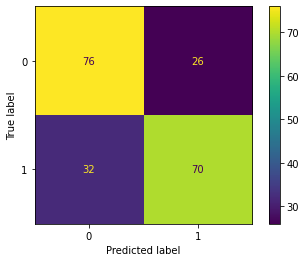

In [190]:
cm = confusion_matrix(y_test, lr_pred, labels= lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lr.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.21750
Feature: 1, Score: 1.36731
Feature: 2, Score: 0.15264
Feature: 3, Score: 0.22826
Feature: 4, Score: -0.34837
Feature: 5, Score: 0.65941
Feature: 6, Score: 0.33435
Feature: 7, Score: 0.14191


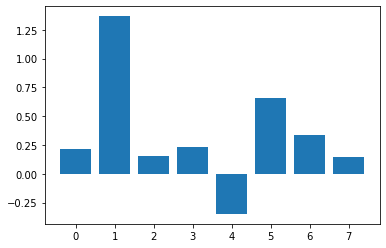

In [191]:
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Logistic Regression using Stats Model

In [192]:
import statsmodels.api as sm

In [193]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.477241
         Iterations 6


In [194]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  474
Model:                          Logit   Df Residuals:                      466
Method:                           MLE   Df Model:                            7
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.3115
Time:                        04:59:17   Log-Likelihood:                -226.21
converged:                       True   LL-Null:                       -328.55
Covariance Type:            nonrobust   LLR p-value:                 1.171e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2324      0.143      1.621      0.105      -0.049       0.513
x2             1.3558      0.192      7.059      0.000       0.979       1.732
x3             0.1435      0.132      1.088      0.2

### XG- Boost after SMOTE

In [195]:
from xgboost import XGBClassifier

In [196]:
xgb = XGBClassifier(n_estimators=2000, max_depth=3, 
                    learning_rate=0.2, booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [197]:
pred_x = xgb.predict(X_test)

In [198]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.7696078431372549

In [199]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       102
           1       0.74      0.82      0.78       102

    accuracy                           0.77       204
   macro avg       0.77      0.77      0.77       204
weighted avg       0.77      0.77      0.77       204



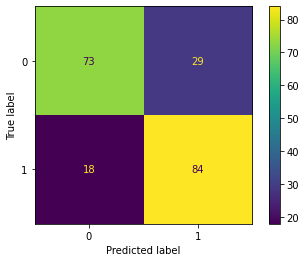

In [200]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

In [201]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [202]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'n_estimators': hp.quniform('n_estimator',1000, 5000, 500),
        'learning_rate': hp.uniform('learning_rate', 0.01, 5),
        'seed': 0
    }
        

In [203]:
def objective(space):
    clf= XGBClassifier(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),
                    learning_rate= int(space['learning_rate']), colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [204]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 300,
                        trials = trials)

SCORE:
0.5
SCORE:
0.6911764705882353
SCORE:
0.7156862745098039
SCORE:
0.7647058823529411
SCORE:
0.6911764705882353
SCORE:
0.7156862745098039
SCORE:
0.5
SCORE:
0.5
SCORE:
0.6715686274509803
SCORE:
0.6911764705882353
SCORE:
0.7598039215686274
SCORE:
0.6813725490196079
SCORE:
0.6813725490196079
SCORE:
0.7647058823529411
SCORE:
0.5
SCORE:
0.6911764705882353
SCORE:
0.5
SCORE:
0.7647058823529411
SCORE:
0.7696078431372549
SCORE:
0.7598039215686274
SCORE:
0.7254901960784313
SCORE:
0.7156862745098039
SCORE:
0.7254901960784313
SCORE:
0.7205882352941176
SCORE:
0.6813725490196079
SCORE:
0.7647058823529411
SCORE:
0.7647058823529411
SCORE:
0.7745098039215687
SCORE:
0.5
SCORE:
0.7254901960784313
SCORE:
0.75
SCORE:
0.5
SCORE:
0.5
SCORE:
0.7696078431372549
SCORE:
0.7156862745098039
SCORE:
0.7450980392156863
SCORE:
0.7696078431372549
SCORE:
0.7156862745098039
SCORE:
0.6617647058823529
SCORE:
0.5
SCORE:
0.7598039215686274
SCORE:
0.7696078431372549
SCORE:
0.6911764705882353
SCORE:
0.7401960784313726
SCORE

In [205]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9395698000447616, 'learning_rate': 1.6079177576016035, 'max_depth': 9.0, 'n_estimator': 4500.0}


In [206]:
xgb = XGBClassifier(n_estimators = 1000, colsample_bytree = 0.5230180810650478,learning_rate = 1.8238919122173243, 
                    max_depth = 5,
                    booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.5230180810650478, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.8238919122173243,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=5,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [207]:
pred_x = xgb.predict(X_test)

In [208]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.75

In [209]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       102
           1       0.73      0.79      0.76       102

    accuracy                           0.75       204
   macro avg       0.75      0.75      0.75       204
weighted avg       0.75      0.75      0.75       204



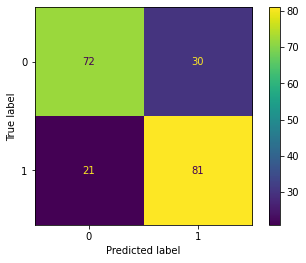

In [210]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.11432
Feature: 1, Score: 0.21943
Feature: 2, Score: 0.19978
Feature: 3, Score: 0.13034
Feature: 4, Score: 0.17163
Feature: 5, Score: 0.08755
Feature: 6, Score: 0.05166
Feature: 7, Score: 0.02528


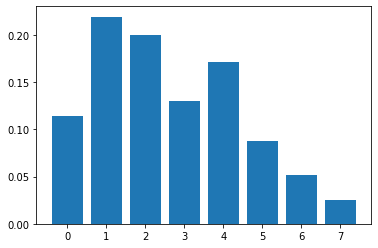

In [211]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### AUC-AOC Curve after SMOTE

In [212]:
# predict probabilities
pred_prob1 = knn.predict_proba(X_test)
pred_prob2 = lda.predict_proba(X_test)
pred_prob3 = qda.predict_proba(X_test)
pred_prob4 = lr.predict_proba(X_test)
pred_prob5 = xgb.predict_proba(X_test)

In [213]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [214]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5)

0.8199730872741253 0.8490003844675125 0.8181468665897732 0.7822952710495963 0.8199730872741253


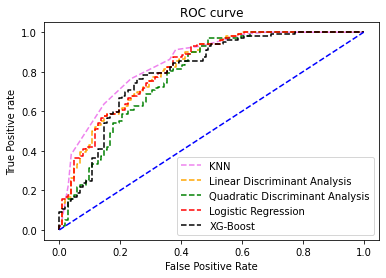

In [215]:
# matplotlib
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='violet', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Linear Discriminant Analysis')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Quadratic Discriminant Analysis')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='XG-Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## Conclusion

### Without smote the best model is KNN with an accuracy of *79%* and also the AUC-ROC score, after implementing SMOTE can see that KNN has the best accuracy at *83%* but the AUC-ROC score for LDA is the highest. I choose KNN over LDA as its errors which are False Positive(FP) & False Negative(FN) are low compared to LDA.
### Thus, it being a healthcare problem we should try to choose a model whose not only accuracy-wise good but also False Positive(FP) & False Negative(FN) are low and hence KNN is a better model according to me.